In [1]:
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
def solve_missing_value(df):
    column_to_fill_with_na = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
                          "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual",
                          "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtQual",
                          "BsmtQual", "BsmtCond", "BsmtFinType1"]
    columns_to_fill_with_mode = ["Electrical", "MasVnrType", "GarageYrBlt",
                                'MSZoning', 'Utilities', 'Exterior1st',
                                'Exterior2nd', 'KitchenQual', 'Functional',
                                'SaleType']
    columns_to_fill_with_median = ["LotFrontage", "MasVnrArea"]
    
    df[column_to_fill_with_na] = df[column_to_fill_with_na].fillna(
    "not available")
    for col in columns_to_fill_with_mode:
        df[col] = df[col].mode()[0]
    for col in columns_to_fill_with_median:
        df[col] = df[col].mode()[0]
    return df

In [4]:
train_df = pd.read_csv("../data/train.csv").drop(["Id"], axis = 1)
train_df = solve_missing_value(train_df)


test_df = pd.read_csv("../data/test.csv")
test_index = test_df.pop("Id")
test_df = solve_missing_value(test_df)

# Missing Value Analysis

In [22]:
temp = pd.DataFrame(test_df.isna().sum())

In [23]:
temp[temp[0] > 0]

,0
MSZoning,4
Utilities,2
Exterior1st,1
Exterior2nd,1
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFullBath,2
BsmtHalfBath,2


In [30]:
for column in temp[temp[0] > 0].index:
    columns = ['MSZoning', 'Utilities', 'Exterior1st',
     'Exterior2nd', 'KitchenQual', 'Functional',
     'SaleType']
    if column not in columns:
        print(column)
    

    
    


BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageCars
GarageArea


In [27]:
def see_data(columns):
    display(temp_df[column].value_counts())

In [29]:
see_data("SaleType")

NameError: name 'temp_df' is not defined

In [ ]:
BsmtUnfSF, BsmtFinSF2

In [19]:
l = "MSZoning, Utilities, Exterior1st, Exterior2nd, KitchenQual, Functional, SaleType"
[i.strip() for i in l.split(",")]

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'Functional',
 'SaleType']

# Categorical and Numeric Columns Identification

In [6]:
columns = train_df.columns
unique_values = train_df.nunique().values
total_values = train_df.shape[0] - train_df.isna().sum().values
unique_df = pd.DataFrame(zip(columns, unique_values, total_values),
                         columns=["column_name", "unique_values",
                                  "total_values"])
columns_to_drop = unique_df[unique_df["unique_values"]==1]["column_name"].values.tolist()
columns_to_drop += ["Utilities", "Street", "Condition2"]
unique_df = unique_df[unique_df["unique_values"]>1]
train_df = train_df.drop(columns_to_drop, axis = 1)

In [7]:
numeric_columns = ["LotArea", "BsmtFinSF1", "BsmtFinSF2", "1stFlrSF", "2ndFlrSF",
                   "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF",
                   "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MiscVal",
                   "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "SalePrice",
                  "TotalBsmtSF","BsmtUnfSF"]
categorical_columns = unique_df[~unique_df["column_name"].isin(numeric_columns)]["column_name"].values

In [8]:
numeric_columns = list(set(numeric_columns) - set(columns_to_drop))
categorical_columns = list(set(categorical_columns) - set(columns_to_drop))

In [9]:
testing_df = train_df.copy()
train_x = testing_df[testing_df.columns[:-1]]
train_y = testing_df["SalePrice"].values

In [10]:
encoder = OneHotEncoder(handle_unknown='ignore')
temp = encoder.fit_transform(train_x[categorical_columns].values.tolist()).toarray()

In [11]:
train_x = train_x.drop(categorical_columns, axis = 1)
temp_df = pd.DataFrame(temp)
train_x = pd.merge(train_x, temp_df , left_on=train_x.index, right_on = temp_df.index )

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X,x,Y,y = train_test_split(train_x, train_y)

In [14]:
model = LinearRegression()
model.fit(X,Y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_base.py:533: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.score(x,y)

0.726557104814476

In [35]:
ll = []
for i in train_df["LotArea"].values:
    ll.append(str(i)[0])

In [40]:
from collections import Counter


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


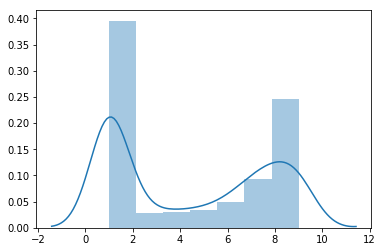

In [44]:
sns.distplot([ int(i) for i in ll])